# Housing Data Visual Analysis

Although we previously got a pretty good R squared quality metric for predicting house values using a linear regression model (see here https://www.ibm.com/developerworks/community/blogs/JohnBoyer/entry/Measuring_the_Quality_of_a_TensorFlow_Regression_Model), there still may be a lot of room for creating a better predictive model for house values using the housing data. One way to explore whether or to what extent this may be true is by visually analyzing the data set. Specifically, the variable being predicted (house value) will be examined against each predictor variable in isolation to see if any patterns stand out. This is especially important because the ML algorithm is linear regression, so if non-linear data relations exist, then we will know there is room for creating an improved model that gets a higher R squared value.

As a prerequisite to doing data analysis, we first read in a CSV file containing the housing data.

In [1]:
import pandas as pd
df_data_1 = pd.read_csv('cal_housing_data with headers.csv')

Next, we import the `numpy` library, and then the math plotting library so we can look at scatterplots of each predictor variable against the variable being predicted (house prices). 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Now we make a numpy array out of the data and then isolate the vector for the dependent variable (the house prices) that the linear regression model was trained to predict (see https://www.ibm.com/developerworks/community/blogs/JohnBoyer/entry/An_IBM_Data_Science_Experience_with_TensorFlow).

In [3]:
data = np.array([x for x in df_data_1.values])
y = np.delete(data, slice(0, 8), axis=1)

We examine a scatterplot of the predictor variable Longitude (column 0) against the house prices. There is clearly a pattern to the data, and it is also not linear. So, a linear curve may be somewhat helpful (we did get a decent R squared, after all), but the pattern is more reminiscent of a quadratic (parabolic) curve or an inverted quartic curve, which is a degree four polynomial with two concave down humps. Although it is not often immediately evident why a particular pattern in data exists, in this case, it's fairly obvious that the two price 'humps' correspond to high value properties in the Los Angeles and Silicon Valley areas. 

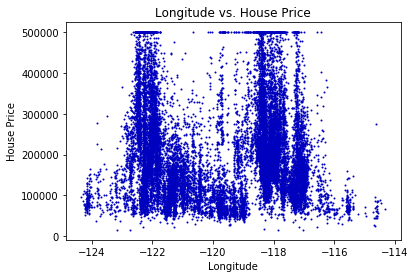

In [4]:
x = np.delete(data, slice(1, 9), axis=1) 

color = "#0000BF"
plt.scatter(x, y, c=color, s=1)
plt.title('Longitude vs. House Price')
plt.xlabel('Longitude')
plt.ylabel('House Price')
plt.show()

When we examine a scatterplot of the predictor variable Latitude (column 1) against the house prices, we see a similar looking pattern of two humps. This is because scanning northward toward increasing latitude also hits the same regions where house prices are highest. If you look a little closer, you can even see a more intricate pattern involving higher prices around San Diego, then Los Angeles, then tapering off until the second hump for the San Jose / San Francisco area, then tapering off except more slowly because of places like Sacramento. Who knows how intricate a pattern we might discern if we look hard enough with our neural networks?

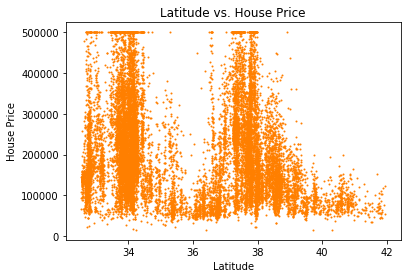

In [5]:
x = np.delete(data, slice(0, 1), axis=1) 
x = np.delete(x, slice (1, 8), axis=1)

color = "#FF7F00"
plt.scatter(x, y, c=color, s=1)
plt.title('Latitude vs. House Price')
plt.xlabel('Latitude')
plt.ylabel('House Price')
plt.show()

When we examine a scatterplot of Housing Median Age (column 2) against the house prices, the best we can say is that it looks like a hot mess. The linear regression model may be getting a tiny bit of R squared mileage out of a line, but adding virtually any variable can slightly boost R squared without really capturing any kind of useful relationship to the dependent variable. When a variable shows a plot that looks this much like randomness, it's worth testing whether it would be better to just leave it out and save compute resources for processing better predictors.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


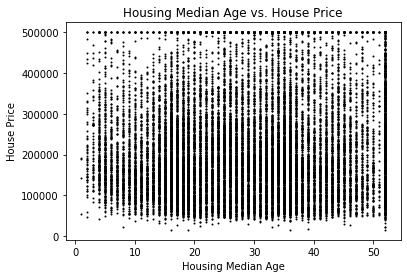

In [6]:
x = np.delete(data, slice(0, 2), axis=1) 
x = np.delete(x, slice (1, 7), axis=1)

color = (0,0,0)
plt.scatter(x, y, c=color, s=1)
plt.title('Housing Median Age vs. House Price')
plt.xlabel('Housing Median Age')
plt.ylabel('House Price')
plt.show()

The scatterplot for the total rooms square footage (column 3) against the house prices shows an interesting and different pattern. Not too surprising a pattern though: more living space, higher cost, simple as that. It's quite reasonable to see the pattern as a steeply sloped line and hence that linear regression would be appropriate. It may be possible to get increase R squared with, say, a thin concave down parabola. Experimentation would be the only way to tell.

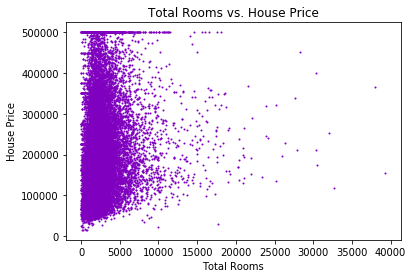

In [7]:
x = np.delete(data, slice(0, 3), axis=1) 
x = np.delete(x, slice (1, 6), axis=1)

color = "#7F00BF"
plt.scatter(x, y, c=color, s=1)
plt.title('Total Rooms vs. House Price')
plt.xlabel('Total Rooms')
plt.ylabel('House Price')
plt.show()

Also not surprisingly, there is a similar pattern in the scatterplot comparing total bedroom square footage and (column 4) and housing prices. It's remotely possible, in this case, that a cubic relationship could do slightly better than a parabola, but more time-consuming experimentation would be needed to test this possibility. If only there were a way to automate the testing for such patterns... :-) 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


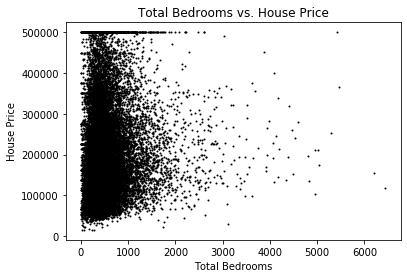

In [8]:
x = np.delete(data, slice(0, 4), axis=1) 
x = np.delete(x, slice (1, 5), axis=1)

color = (0,0,0)
plt.scatter(x, y, c=color, s=1)
plt.title('Total Bedrooms vs. House Price')
plt.xlabel('Total Bedrooms')
plt.ylabel('House Price')
plt.show()

Although for different reasons, there is a similar looking pattern between population density (column 5) and house prices. It's easy to see a line with a sharp upward slope being reasonably reflective of this data just based on supply and demand, but again there are nuances suggesting that a possible quadratic or cubic curve might be a somewhat better fit. Still, it's not a high priority to do manual work to find a better fit when you see a pattern like this.

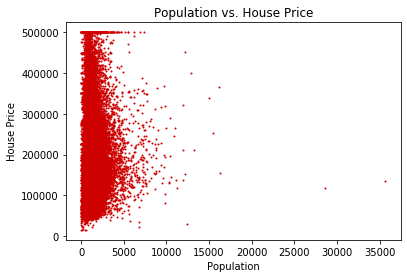

In [9]:
x = np.delete(data, slice(0, 5), axis=1) 
x = np.delete(x, slice (1, 4), axis=1)

color = "#CF0000"
plt.scatter(x, y, c=color, s=1)
plt.title('Population vs. House Price')
plt.xlabel('Population')
plt.ylabel('House Price')
plt.show()

As another measure of population density, the density of households (column 6) shows a similar pattern with house prices, so again, linear regression is a good model.

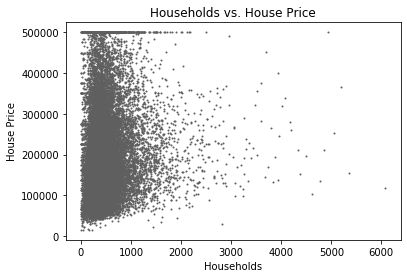

In [10]:
x = np.delete(data, slice(0, 6), axis=1) 
x = np.delete(x, slice (1, 3), axis=1)

color = "#5F5F5F"
plt.scatter(x, y, c=color, s=1)
plt.title('Households vs. House Price')
plt.xlabel('Households')
plt.ylabel('House Price')
plt.show()

The scatterplot for median income value (column 7) relative to house price shows the nicest example of a linear relationship. One might easily assume that that there would be a linearly increasing trend between earning more money and buying a more expensive house, but it's still best to look at the data to make sure it matches your assumptions.  And still, as with any variable, it may be possible to do better with a polynomial, such as one that produces slight bends in the line.  But if you have to do it manually, it would be the lowest priority when you see such a clearly linear pattern as this.

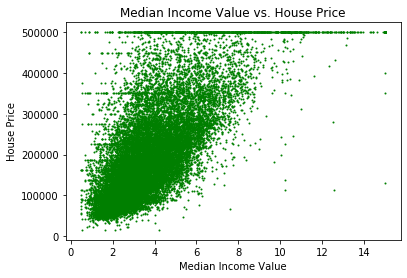

In [11]:
x = np.delete(data, slice(0, 7), axis=1) 
x = np.delete(x, slice (1, 3), axis=1)

color = "#007F00"
plt.scatter(x, y, c=color, s=1)
plt.title('Median Income Value vs. House Price')
plt.xlabel('Median Income Value')
plt.ylabel('House Price')
plt.show()

In summary, we've now seen that a number of the variables perform reasonably well against the assumption of linearity, and that helps understand why the linear regression model had a good R squared metric. And yet, we've also seen that some variables, especially the longitude and latitude, have clearly non-linear patterns, which suggests there is a better predictive model out there. In the upcoming work, we'll explore how to build it... stay tuned!